## Importing libraires and data

In [1]:
# Importing modules necessary for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import time
import warnings
import random
from collections import Counter
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import specificity_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
# TotalLines = sum(1 for line in open("data/CreditCardFraud.csv")) - 1
# Records = 10000
# skip = sorted(random.sample(range(1,TotalLines+1),TotalLines-Records))
# data = pd.read_csv("data/CreditCardFraud.csv", skiprows=skip)

In [3]:
# data.to_csv("NewCreditCardFraud.csv", encoding='utf-8')

## Importing Dataset

In [4]:
# Reading the CSV file
data = pd.read_csv("NewCreditCardFraud.csv", encoding = 'utf8')

In [5]:
# Displaying number of rows and columns in dataset
data.shape

(10000, 23)

In [7]:
# Displaying different attributes and their datatypes
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   trans_date_trans_time  10000 non-null  object 
 2   cc_num                 10000 non-null  int64  
 3   merchant               10000 non-null  object 
 4   category               10000 non-null  object 
 5   amt                    10000 non-null  float64
 6   first                  10000 non-null  object 
 7   last                   10000 non-null  object 
 8   gender                 10000 non-null  object 
 9   street                 10000 non-null  object 
 10  city                   10000 non-null  object 
 11  state                  10000 non-null  object 
 12  zip                    10000 non-null  int64  
 13  lat                    10000 non-null  float64
 14  long                   10000 non-null  float64
 15  cit

## Pre-processing 

In [8]:
# Displaying the first 5 instances of the dataset
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,90012,22/07/2020 00:45,4195740185974,fraud_Erdman-Kertzmann,gas_transport,12.40,Benjamin,Robinson,M,0701 John Ranch,...,45.5303,-122.7033,841711,"Engineer, building services",04/04/1963,ad131a6f55acb2f9cf860cc34af04bec,1374453920,45.619941,-123.009911,1
1,101988,27/07/2020 00:45,30290551782700,fraud_Cole PLC,grocery_pos,280.58,John,Clarke,M,27909 Peter Motorway,...,36.8020,-87.8286,13422,Commissioning editor,03/09/1961,c746035a36353904f786164555d0d431,1374885956,35.843189,-87.294812,1
2,121745,03/08/2020 00:39,4653879239169990,fraud_Barton Inc,grocery_pos,298.35,Monica,Tucker,F,302 Christina Islands,...,37.0581,-86.1938,6841,"Therapist, sports",06/06/1999,1c75cb866bb4b25a3b44155c04fb58b7,1375490380,37.356155,-85.517653,1
3,167837,18/08/2020 18:13,213112402583773,fraud_Beier LLC,entertainment,464.30,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),03/06/1984,b61d49087875e4de277b751bb8eb36cf,1376849616,33.375886,-82.772423,1
4,171881,20/08/2020 13:26,4981132848794,fraud_Stamm-Rodriguez,misc_pos,49.47,Joseph,Spencer,M,7854 Stephanie Island Suite 788,...,40.0113,-80.9701,128,Child psychotherapist,03/04/1946,a8263ccf80d0542607485367c9a156e9,1377005169,40.887247,-80.498858,1


### Checking Null values and duplicated records 

In [9]:
# Counting and Displaying the total number of Null values within the dataset
print("\033[1m \nTotal number of Null values in each columns : ")
data.isnull().sum()

 
Total number of Null values in each columns : 


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# Counting and Displaying the total number of duplicate instances within the dataset
print("\033[1m \nTotal number of duplicated instances in dataset: ")
data.duplicated().sum()

 
Total number of duplicated instances in dataset: 


0

### Feature Creation & Extraction

In [11]:
# Displaying attributes that can be used to extract other relevant data
PossibleDataCreation = data[['trans_date_trans_time', 'dob', 'cc_num']]
PossibleDataCreation.head(5)

,trans_date_trans_time,dob,cc_num
0,22/07/2020 00:45,04/04/1963,4195740185974
1,27/07/2020 00:45,03/09/1961,30290551782700
2,03/08/2020 00:39,06/06/1999,4653879239169990
3,18/08/2020 18:13,03/06/1984,213112402583773
4,20/08/2020 13:26,03/04/1946,4981132848794


In [12]:
# Converting trans_date_trans_time arrtribute from object to datetime type
data['trans_date_trans_time'] = data['trans_date_trans_time'].astype('datetime64[ns]')

# Inserting the extracted attributes to the original dataset
data.insert(0,'Transaction_year','')
data.insert(1,'Transaction_month','')
data.insert(2,'Transaction_week','')
data.insert(3,'Transaction_day','')
data.insert(4,'Transaction_hour','')
data.insert(5,'Weekend_Transaction','')

# Extracting different time periods from the trans_date_trans_time attribute
data['Transaction_year'] = data['trans_date_trans_time'].dt.year
data['Transaction_month'] = data['trans_date_trans_time'].dt.month
data['Transaction_week'] = data['trans_date_trans_time'].dt.week
data['Transaction_day'] = data['trans_date_trans_time'].dt.day
data['Transaction_hour'] = data['trans_date_trans_time'].dt.hour
data["Weekend_Transaction"] = data['trans_date_trans_time'].dt.dayofweek > 4

In [13]:
# Displaying the extracted time periods from trans_date_trans_time attribute 
ExtratedDateTime = data[["trans_date_trans_time", "Transaction_year",
                         "Transaction_month", "Transaction_day",
                         "Transaction_week", "Transaction_hour",
                         "Weekend_Transaction"]]
ExtratedDateTime.head(5)

,trans_date_trans_time,Transaction_year,Transaction_month,Transaction_day,Transaction_week,Transaction_hour,Weekend_Transaction
0,2020-07-22 00:45:00,2020,7,22,30,0,False
1,2020-07-27 00:45:00,2020,7,27,31,0,False
2,2020-03-08 00:39:00,2020,3,8,10,0,True
3,2020-08-18 18:13:00,2020,8,18,34,18,False
4,2020-08-20 13:26:00,2020,8,20,34,13,False


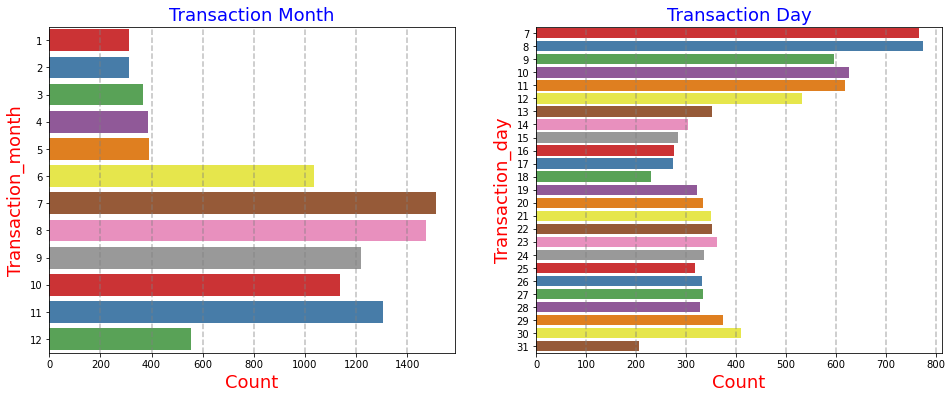

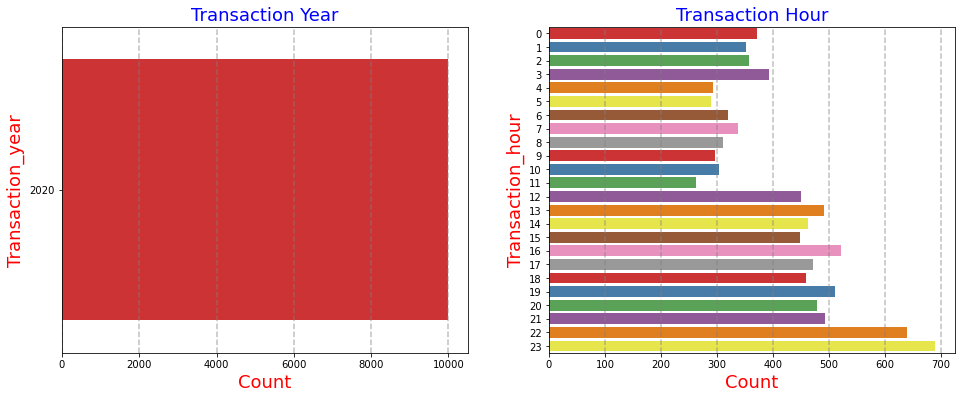

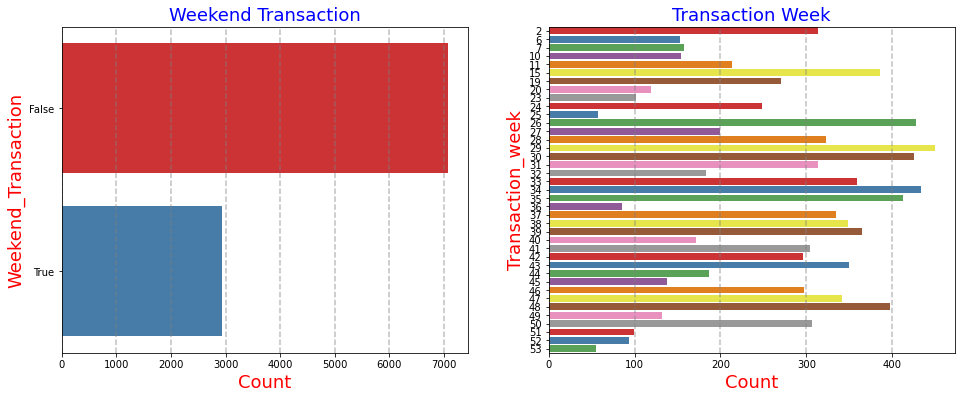

In [14]:
# Visualising the total record count of the different time period attributes
DateExtracted = ['Transaction_day','Transaction_month','Transaction_hour','Transaction_year', 'Transaction_week', 'Weekend_Transaction']
DateExtracted_Ttile = ["Transaction Day", "Transaction Month", "Transaction Hour", "Transaction Year", 'Transaction Week', 'Weekend Transaction']
LengthCounter = 0

# Plotting each of the extracted time period attributes in a horizontal bar chart
while LengthCounter < len(DateExtracted):
    plt.figure(figsize=[16,6])
    plt.subplot(1,2,2)
    plt.title(DateExtracted_Ttile[LengthCounter], color='b', fontsize='18')
    sns.countplot(y=DateExtracted[LengthCounter], data=data, palette="Set1")
    plt.grid(color='grey', linestyle='--', linewidth=1.5, axis='x', alpha=0.5)
    plt.xlabel('Count', color='r', fontsize='18')
    plt.ylabel(DateExtracted[LengthCounter], color='r', fontsize='18')
    LengthCounter += 1

    
    plt.subplot(1,2,1)
    plt.title(DateExtracted_Ttile[LengthCounter], color='b', fontsize='18')
    sns.countplot(y=DateExtracted[LengthCounter], data=data, palette="Set1")
    plt.grid(color='grey', linestyle='--', linewidth=1.5, axis='x', alpha=0.5)
    plt.ylabel(DateExtracted[LengthCounter], color='r', fontsize='18')
    plt.xlabel('Count', color='r', fontsize='18')
    LengthCounter += 1


In [15]:
# Converting the date of birth attribute to datetime data type
data['dob'] = pd.to_datetime(data.dob)

# Extracting only the date from the trans_date_trans_time attribute
data['Transaction_Date_Only'] = data['trans_date_trans_time'].dt.date
data['Transaction_Date_Only'] = pd.to_datetime(data.Transaction_Date_Only)

# Changing the format of day, month and year in the date of birth and Transaction_Date_Only attributes
data['dob'] = data['dob'].dt.strftime('%d-%m-%Y')
data['Transaction_Date_Only'] = data['Transaction_Date_Only'].dt.strftime('%d-%m-%Y')

# Converting the date of birth and Transaction_Date_Only attribute to datetime data type
data[['dob','Transaction_Date_Only']] = data[['dob','Transaction_Date_Only']].apply(pd.to_datetime)

# Inserting the calculated age at time of transaction attribute to the original dataset
data.insert(6,'Age_Time_of_Transaction','')

# Calculating the age at the time of transaction
data['Age_Time_of_Transaction'] = (data['Transaction_Date_Only'] - data['dob']) / np.timedelta64(1, 'Y')
data['Age_Time_of_Transaction'] = data['Age_Time_of_Transaction'].astype('int64')

In [16]:
# Displaying the extracted ages at the time of transaction
ExtractedAge = data[["Transaction_Date_Only", "dob", "Age_Time_of_Transaction"]]
ExtractedAge.head(5)

,Transaction_Date_Only,dob,Age_Time_of_Transaction
0,2020-07-22,1963-04-04,57
1,2020-07-27,1961-09-03,58
2,2020-08-03,1999-06-06,21
3,2020-08-18,1984-06-03,36
4,2020-08-20,1946-04-03,74


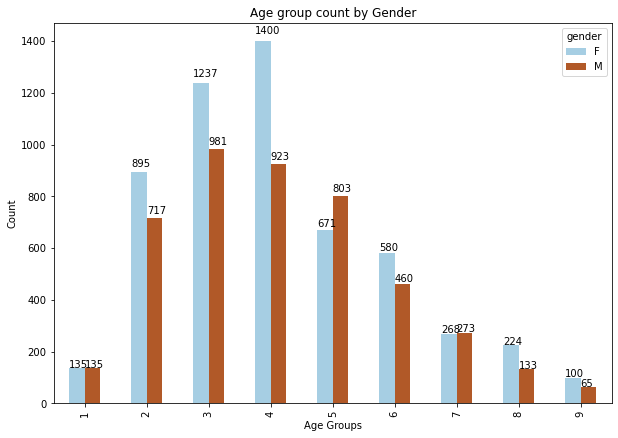

In [17]:
# Dividing the age group into groups of 10s
bins = np.arange(10, 100, 10)

# Grouping the Age group and gender together to dispaly how many Males are Females are in different age groups
data['Age_Group'] = np.digitize(data.Age_Time_of_Transaction, bins, right=True)
counts = data.groupby(['Age_Group', 'gender']).Age_Time_of_Transaction.count().unstack()

# Displaying the bar chart of Age group count by gender
ax = counts.plot(kind='bar',stacked = False, 
                 colormap = 'Paired', figsize=(10, 7),
                 title="Age group count by Gender",
                 ylabel = "Count",
                 xlabel = "Age Groups")

# Displaying the number of records on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.0, p.get_height() * 1.020))

In [18]:
# Displaying number of records where age is under 18
InvalidAge = data.query('Age_Time_of_Transaction < 18')
InvalidAge['Age_Time_of_Transaction'].head(10)
print("\033[1mCount of Ages under 18 : ",InvalidAge['Age_Time_of_Transaction'].count())

Count of Ages under 18 :  88


In [19]:
# Displaying the mean age within the dataset and filling in the mean ages in records where age is under 18
print("\033[1mMean Age : ", round(data["Age_Time_of_Transaction"].mean()))
data.loc[data["Age_Time_of_Transaction"] < 18, "Age_Time_of_Transaction"] = round(data["Age_Time_of_Transaction"].mean())

Mean Age :  47


In [20]:
# Extracting the Credit Cards Issuing Network by the Credit card number
# The credit card number and it's corresponding issuing network information 
# were pulled from https://en.wikipedia.org/wiki/Payment_card_number

data['cc_num'] = data['cc_num'].astype('string')
def conditions(row):
    if (row['cc_num'][0:2] == '34' or row['cc_num'][0:2] == '37') and (len(row['cc_num']) == 15):
        Issuer = 'American Express'
        
    elif (row['cc_num'][0:2] == '31') and (len(row['cc_num']) == 19):
        Issuer = 'China T-Union'
        
    elif (row['cc_num'][0:2] == '62' and (len(row['cc_num']) >= 16) and (len(row['cc_num']) <= 19)):
        Issuer = 'China UnionPay'
        
    elif (row['cc_num'][0:2] == '36' and (len(row['cc_num']) >= 14) and (len(row['cc_num']) <= 19)):
        Issuer = 'Diners Club International'
        
    elif (row['cc_num'][0:2] == '54' and len(row['cc_num']) == 16):
        Issuer = 'Diners Club United States & Canada'
        
    elif (row['cc_num'][0:3] == '636') and (len(row['cc_num']) == 16):
        Issuer = 'InterPayment'

    elif (int(float(row['cc_num'][0:8])) >= 60400100 and int(row['cc_num'][0:8]) <= 60420099)  and (len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19):
        Issuer = 'UKrCard'
        
    elif (row['cc_num'][0:4] == '6011') or (int(row['cc_num'][0:3]) >= 644 and int(row['cc_num'][0:3]) <= 649) or ((row['cc_num'][0:2] == '65')) or (int(row['cc_num'][0:6]) >= 622126 and int(row['cc_num'][0:6]) <= 622925) and (len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19):
        Issuer = 'Discover Card'
        
    elif (row['cc_num'][0:2] == '60' or row['cc_num'][0:2] == '65' or row['cc_num'][0:2] == '81' or row['cc_num'][0:2] == '82' or row['cc_num'][0:3] == '508' or row['cc_num'][0:3] == '353' or row['cc_num'][0:3] == '356') and (len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19):
        Issuer = 'RuPay'

    elif (row['cc_num'][0:3]) == '636' and len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19:
        Issuer = 'InterPayment'
        
    elif (int(row['cc_num'][0:3]) >= 637 and int(row['cc_num'][0:3]) <= 639)  and len(row['cc_num']) == 16:
        Issuer = 'InstaPayment'
        
    elif (int(row['cc_num'][0:4]) >= 3528 and int(row['cc_num'][0:4]) <= 3589)  and (len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19):
        Issuer = 'JCB'

    elif (row['cc_num'][0:4] == '6759' or row['cc_num'][0:6] == '676770' or row['cc_num'][0:6] == '676774') and (len(row['cc_num']) >= 12 and len(row['cc_num']) <= 19):
        Issuer = 'Maestro UK'

    elif (row['cc_num'][0:4] == '5018' or row['cc_num'][0:4] == '5020' or row['cc_num'][0:4] == '5038' or row['cc_num'][0:4] == '5893' or row['cc_num'][0:4] == '6304' or row['cc_num'][0:4] == '6759' or row['cc_num'][0:4] == '6761' or row['cc_num'][0:4] == '6762' or row['cc_num'][0:4] == '6763') and (len(row['cc_num']) >= 12 and len(row['cc_num']) <= 19):
        Issuer = 'Maestro'
        
    elif ((row['cc_num'][0:4]) == '5019' or (row['cc_num'][0:4]) == '4571') and len(row['cc_num']) == 16:
        Issuer = 'Dankort'

    elif (int(row['cc_num'][0:4]) >= 2200 and int(row['cc_num'][0:4]) <= 2204)  and (len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19):
        Issuer = 'Mir'
        
    elif (row['cc_num'][0:4] == '2200') and (len(row['cc_num']) >= 16 and len(row['cc_num']) <= 19):
        Issuer = 'Borica'
        
    elif (int(row['cc_num'][0:7]) >= 6054740 and int(row['cc_num'][0:7]) <= 6054744)  and len(row['cc_num']) == 16:
        Issuer = 'NPS Pridnestrovie'

    elif (int(row['cc_num'][0:4]) >= 2221 and int(row['cc_num'][0:4]) <= 2720) or (int(row['cc_num'][0:2]) >= 51 and int(row['cc_num'][0:2]) <= 55)  and len(row['cc_num']) == 16:
        Issuer = 'Mastercard'

    elif ((row['cc_num'][0:2] == '65') or (row['cc_num'][0:4] == '9792'))  and len(row['cc_num']) == 16 :
        Issuer = 'Troy'

    elif (row['cc_num'][0:1] == '4') and (len(row['cc_num']) == 13 or len(row['cc_num']) == 16) :
        Issuer = 'Visa'

    elif (row['cc_num'][0:4] == '4026' or row['cc_num'][0:6] == '417500' or row['cc_num'][0:4] == '4508' or row['cc_num'][0:4] == '4844' or row['cc_num'][0:4] == '4913' or row['cc_num'][0:4] == '4917') and len(row['cc_num']) == 16:
        Issuer = 'Visa Electron'

    elif (row['cc_num'][0:1] == '1') and len(row['cc_num']) == 15:
        Issuer = 'UATP'

    elif ((int(row['cc_num'][0:6]) >= 506099 and int(row['cc_num'][0:6]) <= 506198) or (int(row['cc_num'][0:6]) >= 650002 and int(row['cc_num'][0:6]) <= 650027) or (int(row['cc_num'][0:6]) >= 507865 and int(row['cc_num'][0:6]) <= 507964))  and (len(row['cc_num']) == 16 or len(row['cc_num']) == 18 or len(row['cc_num']) == 19):
        Issuer = 'Verve'
        
    elif (row['cc_num'][0:6] == '357111') and len(row['cc_num']) == 16:
        Issuer = 'LunkaPay'

    elif (row['cc_num'][0:4] == '8600') and len(row['cc_num']) == 16:
        Issuer = 'UzCard'

    elif (row['cc_num'][0:4] == '9860') and len(row['cc_num']) == 16:
        Issuer = 'Humo'
        
    elif (row['cc_num'][0:1] == '1' or row['cc_num'][0:1] == '2' or row['cc_num'][0:1] == '6' or row['cc_num'][0:1] == '7' or row['cc_num'][0:1] == '8' or row['cc_num'][0:1] == '9') and len(row['cc_num']) == 16:
        Issuer = 'GPN'
    else:
        Issuer = 'Other'
    return Issuer

# Inserting the Issuing Network attributes to the original dataset
data.insert(7,'Issuing_Network','')
data['Issuing_Network'] = data.apply(conditions, axis=1)

Text(0, 0.5, 'Issuing Networks')

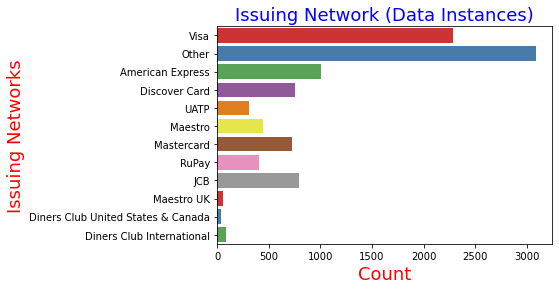

In [21]:
# Visualising the different categories and total instances of Issuing Networks
plt.title("Issuing Network (Data Instances)", color='b', fontsize='18')
sns.countplot(y='Issuing_Network', data=data, palette="Set1")
plt.xlabel('Count', color='r', fontsize='18')
plt.ylabel("Issuing Networks", color='r', fontsize='18')

In [22]:
# Removing Redundant Records
data.drop(['Unnamed: 0', 'trans_num', 'Transaction_Date_Only',
          'Transaction_year', 'Age_Group', 'trans_date_trans_time'],axis=1, inplace=True)
data.head(5)

,Transaction_month,Transaction_week,Transaction_day,Transaction_hour,Weekend_Transaction,Age_Time_of_Transaction,Issuing_Network,cc_num,merchant,category,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,7,30,22,0,False,57,Visa,4195740185974,fraud_Erdman-Kertzmann,gas_transport,...,97210,45.5303,-122.7033,841711,"Engineer, building services",1963-04-04,1374453920,45.619941,-123.009911,1
1,7,31,27,0,False,58,Other,30290551782700,fraud_Cole PLC,grocery_pos,...,42211,36.8020,-87.8286,13422,Commissioning editor,1961-09-03,1374885956,35.843189,-87.294812,1
2,3,10,8,0,True,21,Visa,4653879239169990,fraud_Barton Inc,grocery_pos,...,42171,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,1375490380,37.356155,-85.517653,1
3,8,34,18,18,False,36,Other,213112402583773,fraud_Beier LLC,entertainment,...,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,1376849616,33.375886,-82.772423,1
4,8,34,20,13,False,74,Visa,4981132848794,fraud_Stamm-Rodriguez,misc_pos,...,43985,40.0113,-80.9701,128,Child psychotherapist,1946-04-03,1377005169,40.887247,-80.498858,1


### Feature Transformation

In [23]:
# Displaying attributes that contains irrelevant punctuations and characters
PossibleDataClean = data[['job', 'merchant']]
PossibleDataClean.head(10)

,job,merchant
0,"Engineer, building services",fraud_Erdman-Kertzmann
1,Commissioning editor,fraud_Cole PLC
2,"Therapist, sports",fraud_Barton Inc
3,Research scientist (physical sciences),fraud_Beier LLC
4,Child psychotherapist,fraud_Stamm-Rodriguez
5,Operational investment banker,fraud_Ankunding LLC
6,"Engineer, broadcasting (operations)",fraud_Lebsack and Sons
7,Architect,fraud_Jast Ltd
8,Comptroller,"fraud_Reichert, Huels and Hoppe"
9,Media buyer,fraud_Bernhard Inc


In [24]:
# Removing punctuations and characters from the job attribute
data['job'] = data['job'].str.split(',').str[0]
data['job'] = data['job'].str.split('/').str[0]
data['job'] = data['job'].str.split('-').str[0]
data['job'] = data['job'].str.split('(').str[0]

data['job'] = data['job'].str.lower()
data['job']

0                      engineer
1          commissioning editor
2                     therapist
3           research scientist 
4         child psychotherapist
                 ...           
9995    chief financial officer
9996                     editor
9997              administrator
9998        research scientist 
9999      insurance underwriter
Name: job, Length: 10000, dtype: object

In [25]:
# Removing punctuations and characters from the merchant attribute
data['merchant'] = data['merchant'].str.split('_').str[1]
data['merchant'] = data['merchant'].str.split(',').str[0]
data['merchant'] = data['merchant'].str.lower()
data['merchant']

0       erdman-kertzmann
1               cole plc
2             barton inc
3              beier llc
4        stamm-rodriguez
              ...       
9995         gerlach inc
9996      schoen-quigley
9997     kerluke-abshire
9998          conroy ltd
9999       stracke-lemke
Name: merchant, Length: 10000, dtype: object

In [26]:
# Creating another dataframe to store the original data for Exploratory Data Analysis (EDA)
EDA_Data = data

### Encoding (Cyclical, Label, One-Hot)

### Cyclical Encoding

In [27]:
# Inserting the extracted attributes to the original dataset
data.insert(8,'Transaction_mnth_sin','')
data.insert(9,'Transaction_mnth_cos','')
data.insert(10,'Transaction_week_sin','')
data.insert(11,'Transaction_week_cos','')
data.insert(12,'Transaction_day_sin','')
data.insert(13,'Transaction_day_cos','')
data.insert(14,'Transaction_hr_sin','')
data.insert(15,'Transaction_hr_cos','')

# Cyclical Encoding the Transaction Hour attribute
data['Transaction_hr_sin'] = np.sin(data.Transaction_hour*(2.*np.pi/24))
data['Transaction_hr_cos'] = np.cos(data.Transaction_hour*(2.*np.pi/24))

# Cyclical Encoding the Transaction Month attribute
data['Transaction_mnth_sin'] = np.sin((data.Transaction_month-1)*(2.*np.pi/12))
data['Transaction_mnth_cos'] = np.cos((data.Transaction_month-1)*(2.*np.pi/12))

# Cyclical Encoding the Transaction Day attribute
data['Transaction_day_sin'] = np.sin((data.Transaction_day-1)*(2.*np.pi/31))
data['Transaction_day_cos'] = np.cos((data.Transaction_day-1)*(2.*np.pi/31))

# Cyclical Encoding the Transaction Week attribute
data['Transaction_week_sin'] = np.sin((data.Transaction_week-1)*(2.*np.pi/52))
data['Transaction_week_cos'] = np.cos((data.Transaction_week-1)*(2.*np.pi/52))

In [28]:
# Displaying the extracted cyclical encoded time period attributes
Cyclical_Encoded_data =data[['Transaction_hr_sin', 'Transaction_hr_cos',
                             'Transaction_mnth_sin', 'Transaction_mnth_cos',
                             'Transaction_day_sin', 'Transaction_day_cos',
                             'Transaction_week_sin', 'Transaction_week_cos']]
Cyclical_Encoded_data.head(5)

,Transaction_hr_sin,Transaction_hr_cos,Transaction_mnth_sin,Transaction_mnth_cos,Transaction_day_sin,Transaction_day_cos,Transaction_week_sin,Transaction_week_cos
0,0.000000,1.000000e+00,1.224647e-16,-1.000000,-0.897805,-0.440394,-0.354605,-0.935016
1,0.000000,1.000000e+00,1.224647e-16,-1.000000,-0.848644,0.528964,-0.464723,-0.885456
2,0.000000,1.000000e+00,8.660254e-01,0.500000,0.988468,0.151428,0.885456,0.464723
3,-1.000000,-1.836970e-16,-5.000000e-01,-0.866025,-0.299363,-0.954139,-0.748511,-0.663123
4,-0.258819,-9.659258e-01,-5.000000e-01,-0.866025,-0.651372,-0.758758,-0.748511,-0.663123


### Label encoding

In [29]:
# Seprating and Displaying the binary categorial attributes to label encode
Binary_Categorial_data = data[['Weekend_Transaction', 'gender']]
Binary_Categorial_data.head(5)

,Weekend_Transaction,gender
0,False,M
1,False,M
2,True,F
3,False,F
4,False,M


In [30]:
# Applying Label Encoder to binary categorial attributes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
LabelEncodedData = Binary_Categorial_data.apply(le.fit_transform)

Lencoded_data = data.copy()
Lencoded_data = Lencoded_data.drop(['Weekend_Transaction', 'gender'], axis=1)
data = pd.concat((LabelEncodedData, Lencoded_data), axis=1, join='inner')

LabelEncodedData.head(5)

,Weekend_Transaction,gender
0,0,1
1,0,1
2,1,0
3,0,0
4,0,1


In [31]:
# Seprating and Displaying all of the multi-categorial atributes from the dataset to One-Hot encode
Categorial_data = data.select_dtypes(include=['object', 'datetime64[ns]']).copy()
Categorial_data.head(5)

,Issuing_Network,merchant,category,first,last,street,city,state,job,dob
0,Visa,erdman-kertzmann,gas_transport,Benjamin,Robinson,0701 John Ranch,Portland,OR,engineer,1963-04-04
1,Other,cole plc,grocery_pos,John,Clarke,27909 Peter Motorway,Cadiz,KY,commissioning editor,1961-09-03
2,Visa,barton inc,grocery_pos,Monica,Tucker,302 Christina Islands,Smiths Grove,KY,therapist,1999-06-06
3,Other,beier llc,entertainment,Ana,Howell,4664 Sanchez Common Suite 930,Bradley,SC,research scientist,1984-06-03
4,Visa,stamm-rodriguez,misc_pos,Joseph,Spencer,7854 Stephanie Island Suite 788,Holloway,OH,child psychotherapist,1946-04-03


In [32]:
# Temporarily creating a new data frame to label encoding all of the attributes to display in the Correlation matrix
Categorial_data = Categorial_data.apply(le.fit_transform)
data['cc_num'] = data['cc_num'].astype('int64')

temp_Lencoded_data = data.copy()
temp_Lencoded_data = temp_Lencoded_data.drop(['Issuing_Network', 'merchant', 'category', 'city', 'state', 'job', 'first', 'last', 'street', 'dob'], axis=1)
temp_Lencoded_data = pd.concat((Categorial_data, temp_Lencoded_data), axis=1, join='inner')
temp_Lencoded_data.head(5)

,Issuing_Network,merchant,category,first,last,street,city,state,job,dob,...,Transaction_hr_cos,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,11,153,2,29,361,62,618,36,126,287,...,1.000000e+00,12.40,97210,45.5303,-122.7033,841711,1374453920,45.619941,-123.009911,1
1,8,89,4,167,75,265,110,16,84,256,...,1.000000e+00,280.58,42211,36.8020,-87.8286,13422,1374885956,35.843189,-87.294812,1
2,11,23,4,241,417,292,715,16,374,878,...,1.000000e+00,298.35,42171,37.0581,-86.1938,6841,1375490380,37.356155,-85.517653,1
3,8,37,0,13,201,445,85,39,322,645,...,-1.836970e-16,464.30,29819,34.0326,-82.2027,1523,1376849616,33.375886,-82.772423,1
4,11,556,9,172,396,738,335,34,70,95,...,-9.659258e-01,49.47,43985,40.0113,-80.9701,128,1377005169,40.887247,-80.498858,1


### Identifying week and strong correations

<AxesSubplot:>

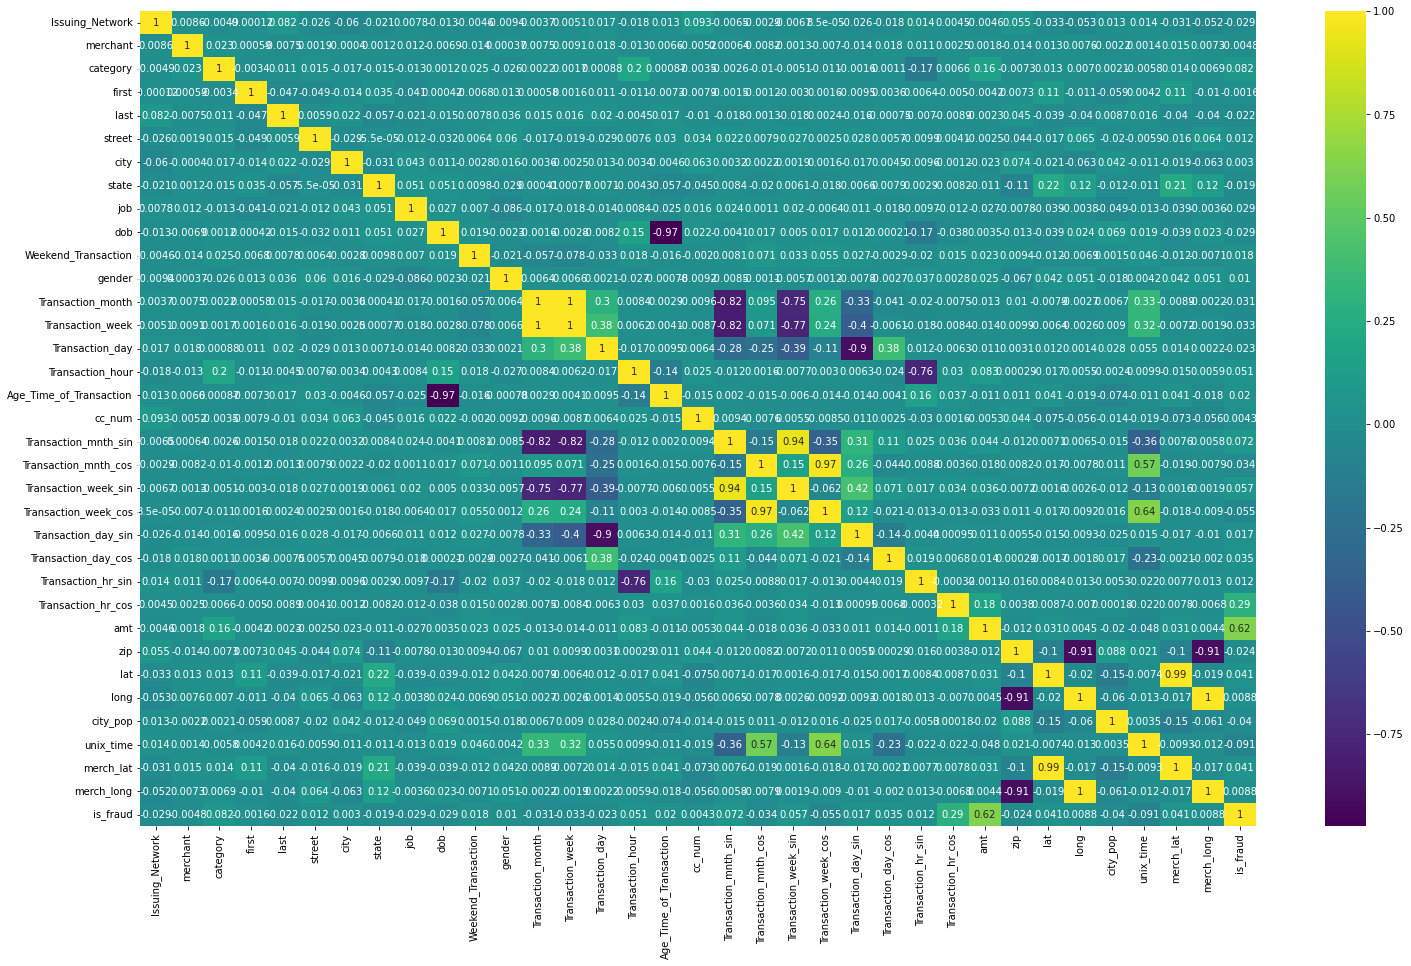

In [33]:
# Displaying the different correlation in a Heatmap of features within the data
plt.subplots(figsize=(25,15))
sns.heatmap(temp_Lencoded_data.corr(),annot=True,cmap='viridis')

In [34]:
# Correlation of different features with is_fraud (Dependent Variable)
temp_Lencoded_data.corr()['is_fraud'].sort_values(ascending = False)

is_fraud                   1.000000
amt                        0.623814
Transaction_hr_cos         0.286160
category                   0.081922
Transaction_mnth_sin       0.071840
Transaction_week_sin       0.057063
Transaction_hour           0.050849
lat                        0.041481
merch_lat                  0.040985
Transaction_day_cos        0.035086
Age_Time_of_Transaction    0.019995
Weekend_Transaction        0.018215
Transaction_day_sin        0.017270
street                     0.012412
Transaction_hr_sin         0.012357
gender                     0.010064
long                       0.008846
merch_long                 0.008775
cc_num                     0.004320
city                       0.002959
first                     -0.001593
merchant                  -0.004780
state                     -0.018815
last                      -0.022227
Transaction_day           -0.023123
zip                       -0.023745
Issuing_Network           -0.028659
job                       -0

In [35]:
# Displaying the number of unique categories in each categorial attributes
UniqueCategorialCount = Categorial_data.nunique().reset_index()
UniqueCategorialCount.columns = ['feature','nunique']
UniqueCategorialCount.sort_values('nunique', ascending=False)

,feature,nunique
5,street,919
9,dob,905
6,city,847
1,merchant,648
4,last,469
8,job,396
3,first,341
7,state,50
2,category,14
0,Issuing_Network,12


In [36]:
# Removing Redundant attributes for the dataset
data.drop(['dob', 'Transaction_day', 'Issuing_Network', 
           'street'],axis=1, inplace=True)
data.head(5)

,Weekend_Transaction,gender,Transaction_month,Transaction_week,Transaction_hour,Age_Time_of_Transaction,cc_num,Transaction_mnth_sin,Transaction_mnth_cos,Transaction_week_sin,...,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,1,7,30,0,57,4195740185974,1.224647e-16,-1.000000,-0.354605,...,OR,97210,45.5303,-122.7033,841711,engineer,1374453920,45.619941,-123.009911,1
1,0,1,7,31,0,58,30290551782700,1.224647e-16,-1.000000,-0.464723,...,KY,42211,36.8020,-87.8286,13422,commissioning editor,1374885956,35.843189,-87.294812,1
2,1,0,3,10,0,21,4653879239169990,8.660254e-01,0.500000,0.885456,...,KY,42171,37.0581,-86.1938,6841,therapist,1375490380,37.356155,-85.517653,1
3,0,0,8,34,18,36,213112402583773,-5.000000e-01,-0.866025,-0.748511,...,SC,29819,34.0326,-82.2027,1523,research scientist,1376849616,33.375886,-82.772423,1
4,0,1,8,34,13,74,4981132848794,-5.000000e-01,-0.866025,-0.748511,...,OH,43985,40.0113,-80.9701,128,child psychotherapist,1377005169,40.887247,-80.498858,1


### OneHotEncoding (Multi-varite Cartegorial features)

In [37]:
# Performing One-Hot Encoding on Multi-varite Cartegorial features
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['last', 'first', 'city','state', 
                                                      'job','merchant','category','city']]).toarray())


data = data.join(encoder_df)
data.drop(['last', 'first', 'city','state', 'job','merchant','category','city'],axis=1, inplace=True)

### Re-Sampling

Text(0, 0.5, 'Fraud')

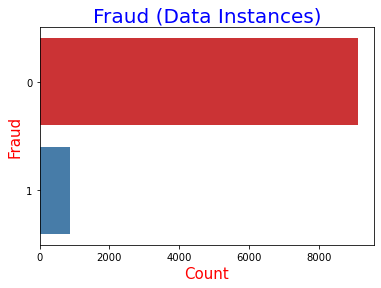

In [38]:
# Visualising whether the is_fraud (Dependent Variable) is represented equally
plt.title("Fraud (Data Instances)", color='b', fontsize='20')
sns.countplot(y='is_fraud', data=data, palette="Set1")
plt.xlabel('Count', color='r', fontsize='15')
plt.ylabel("Fraud", color='r', fontsize='15')

In [39]:
# Defining our X and Y variables (Dependent and Independent variables)
X = data.drop(['is_fraud'], axis=1).values
y = data['is_fraud'].values

# Spliting data into testing (25%) and training (75%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
# Displaying the number of train data on the Dependent Variable before Re-Sampling
print("\033[1mBefore Re-Sampling:",Counter(y_train))

Before Re-Sampling: Counter({0: 6849, 1: 651})


In [41]:
# Fitting the Smote oversampling technique to train data
Sm = SMOTE()
Sm_X_train, Sm_y_train = Sm.fit_resample(X_train, y_train)
print("\033[1mAfter Somte oversampling:", Counter(Sm_y_train))

# Fitting the Random oversampling technique to train data
ROS = RandomOverSampler()
ROS_X_train, ROS_y_train = ROS.fit_resample(X_train, y_train)
print("\033[1mAfter Random oversampling:", Counter(ROS_y_train))

# Fitting the Random undersampling technique to train data
RUS = RandomUnderSampler()
RUS_X_train, RUS_y_train = RUS.fit_resample(X_train, y_train)
print("\033[1mAfter Random underampling:", Counter(RUS_y_train))


AttributeError: 'NoneType' object has no attribute 'split'

### Feature Scaling

In [41]:
# Using the Standard Scaler Normalisation technique
StandardScale = StandardScaler()

# Ftting the Standard Scaler to Smote Oversampled training set
Sm_Scaled_X_train = StandardScale.fit_transform(Sm_X_train)
Sm_X_test = StandardScale.transform(X_test)

# Ftting the Standard Scaler to Random Oversampled training set
ROS_Scaled_X_train = StandardScale.fit_transform(ROS_X_train)
ROS_X_test = StandardScale.transform(X_test)

# Ftting the Standard Scaler to Random Undersampled training set
RUS_Scaled_X_train = StandardScale.fit_transform(RUS_X_train)
RUS_X_test = StandardScale.transform(X_test)

### Dimensionality reduction

### PCA (Principle Component Analysis)


In [42]:
# Displaying the number of rows and columns in the dataset
data.shape

(10000, 3636)

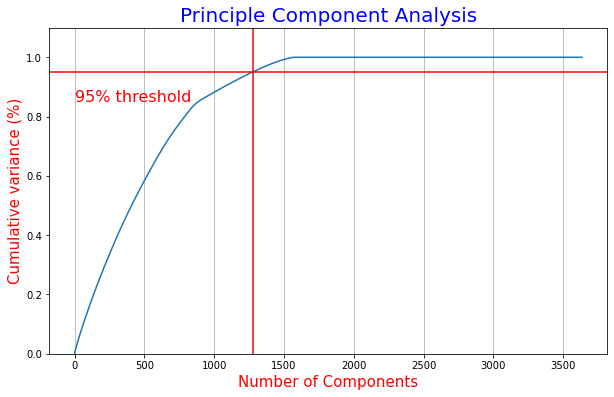

In [43]:
# Fitting the PCA dimensionality reduction technique to the training set
pca = PCA().fit(Sm_Scaled_X_train)

# Specifying the size of the figure
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()

# Plotting the explained variance ration of the training set
plt.ylim(0.0,1.1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Specifying the the X axis, y axis and title labels
plt.xlabel("Number of Components", color='r', fontsize='15')
plt.ylabel("Cumulative variance (%)", color='r', fontsize='15')
plt.title("Principle Component Analysis", color='b', fontsize='20')

# Specifying the cut off point at 95% Cumulative variance and ploting the chart
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color = 'red', fontsize=16)
plt.axvline(x=1275, color='r', linestyle='-')
ax.grid(axis='x')
plt.show()

In [44]:
# Specifying the number of components for PCA
pca = PCA(n_components = 0.95)

# Ftting PCA technique to Smote Oversampled training set
PCA_Sm_X_train = pca.fit_transform(Sm_Scaled_X_train)
PCA_Sm_X_test = pca.transform(Sm_X_test)

# Ftting PCA technique to Random Oversampled training set
PCA_ROS_X_train = pca.fit_transform(ROS_Scaled_X_train)
PCA_ROS_X_test = pca.transform(ROS_X_test)

# Ftting PCA technique to Random Undersampled training set
PCA_RUS_X_train = pca.fit_transform(RUS_Scaled_X_train)
PCA_RUS_X_test = pca.transform(RUS_X_test)

## Machine Learning Models (KNN, SVM, Decision Tree)

### K-nearest Neighbour (KNN)

In [45]:
# Calling the K-nearest neighbour classifier
KNN_model = KNeighborsClassifier()

# Fitting the KNN model to Smote OverSampled training set
KNN_model.fit(PCA_Sm_X_train, Sm_y_train)
PCA_Sm_y_pred = KNN_model.predict(PCA_Sm_X_test)
PCA_Sm_Acc = metrics.accuracy_score(y_test, PCA_Sm_y_pred)

# Fitting the KNN model to Random OverSampled training set
KNN_model.fit(PCA_ROS_X_train, ROS_y_train)
PCA_OverSam_y_pred = KNN_model.predict(PCA_ROS_X_test)
PCA_OvrSam_Acc = metrics.accuracy_score(y_test, PCA_OverSam_y_pred)

# Fitting the KNN model to Random UnderSampled training set
KNN_model.fit(PCA_RUS_X_train, RUS_y_train)
PCA_UndSam_y_pred = KNN_model.predict(PCA_RUS_X_test)
PCA_UndSam_Acc = metrics.accuracy_score(y_test, PCA_UndSam_y_pred)


### Confusion Matrix (KNN)

In [81]:
# Specifying the different Titles for the KNN confusion matrix
titles = ["Smote OverSampled (KNN)\nConfusion Matrix", "Random OverSampled (KNN)\nConfusion Matrix", "Random UnderSampled (KNN)\nConfusion Matrix"]

# Specifying the y pred features from the different sampled data
classifiers = [PCA_Sm_y_pred, PCA_OverSam_y_pred, PCA_UndSam_y_pred]

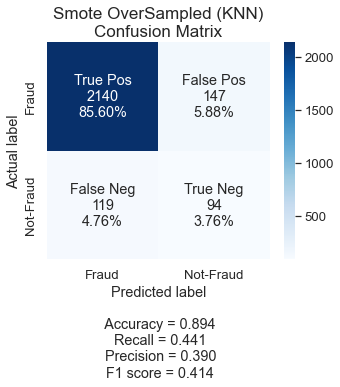

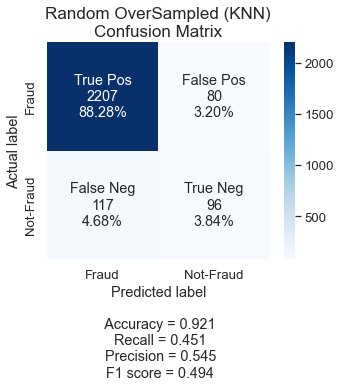

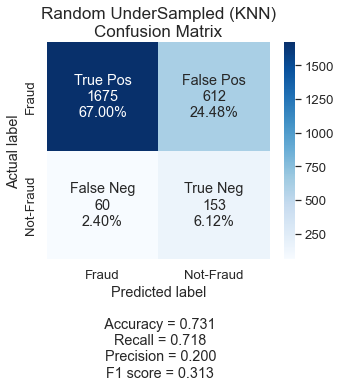

In [82]:
# List to store all of the different Accuracy produced by the different sampled data
KNN_MetricAcc_results_list = []

# Iterating over the y predict features from the different sampled data; and displaying metrics
for y_test_pred, title in zip(classifiers, titles):
    
    # Calling the Confusion matrix method to take in the y test and y test pred
    cfm = confusion_matrix(y_test, y_test_pred)
    
    # Displaying the "True Pos", "False Pos", "False Neg", and "True Neg" within the confusion matrix
    labels = ["True Pos", "False Pos", "False Neg", "True Neg"]
    counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]

    # Displying the different labels within the Confusion Matrix
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,counts,percentages)]
    target_names = ["Fraud", "Not-Fraud"]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    sns.set(font_scale=1.2)

    # Getting the scores of different metrics
    accuracy  = metrics.accuracy_score(y_test, y_test_pred)
    recall    = metrics.recall_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    f1_score  = f"{2*(precision*recall) / (precision + recall) :.3}"

    # Converting metrics into 3 significant figures
    accuracy = ("%.3f" % accuracy)
    KNN_MetricAcc_results_list.append(accuracy)
    recall = ("%.3f" % recall)
    precision = ("%.3f" % precision)

    # Displaying the accuracy, precision and recall within the confusion matrix
    plt.title(title, fontsize = 17)
    plt.xlabel('Predicted label'+ "\n\n Accuracy = " + str(accuracy) + "\n Recall = " + str(recall)
              + "\n Precision = " + str(precision) + "\n F1 score = " + str(f1_score)) 
    plt.ylabel("Actual label") 
    plt.show()

# Recording the highest accuracy score produced by the different sampled data
KNN_MetricAcc_results = max(KNN_MetricAcc_results_list)

### AUC (KNN)

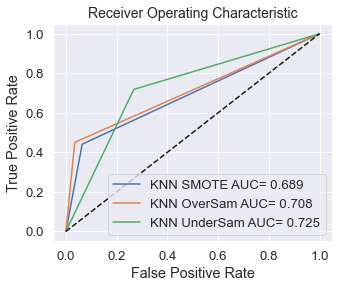

In [83]:
# Calculating and displaying the AUC curve of Somte OverSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_Sm_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="KNN SMOTE AUC= %0.3f" % auc)

# Calculating and displaying the AUC curve of Random OverSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_OverSam_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="KNN OverSam AUC= %0.3f" % auc)

# Calculating and displaying the AUC curve of Random UnderSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_UndSam_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="KNN UnderSam AUC= %0.3f" % auc)

# Ploting the random guess line of (50/50) True Positive and False Positive Rate
plt.rcParams["figure.figsize"] = (5,4)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Receiver Operating Characteristic", fontsize = 14)

# Labeling the X and Y axis of AUC chart
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Cross Validation (KNN)

In [49]:
# 10-Fold Cross validating on KNN model
KNN_CV_scores = cross_val_score(KNN_model,X,y,cv=10, scoring='accuracy')
print(KNN_CV_scores)

[0.879 0.875 0.867 0.89  0.899 0.896 0.906 0.891 0.892 0.908]


In [50]:
# Calculating the mean Accuracy of 10-Fold Cross Validation on KNN model
avgKNN = KNN_CV_scores.mean()
print("Average CV model accuracy:{:.3f}".format(avgKNN))

Average CV model accuracy:0.890


### Random Search (KNN)

In [51]:
# Specifying 3 different hyperparameters for Random Searh on KNN model; neighbours, weights and algorithm
k_list = list(range(1,31,2))
weight_list = ['uniform','distance']
algo_list = ['brute', 'auto']
para_dict = dict(n_neighbors=k_list, weights=weight_list, algorithm=algo_list)
print(para_dict)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'weights': ['uniform', 'distance'], 'algorithm': ['brute', 'auto']}


In [52]:
# Conducting random search on different varitions of hyperparaters 
rand = RandomizedSearchCV(KNN_model,para_dict,cv=5,scoring='accuracy',return_train_score=False,
                         n_iter=10, random_state=5)

# Fitting the random search technique to the X and Y train
rand.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['brute', 'auto'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [53]:
# Displaying the mean accuracy from 10-fold CV on different hyperparameters
pd.DataFrame(rand.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.911200,"{'weights': 'distance', 'n_neighbors': 1, 'alg..."
1,0.911867,"{'weights': 'uniform', 'n_neighbors': 13, 'alg..."
2,0.911600,"{'weights': 'uniform', 'n_neighbors': 5, 'algo..."
3,0.912400,"{'weights': 'uniform', 'n_neighbors': 23, 'alg..."
4,0.912800,"{'weights': 'uniform', 'n_neighbors': 27, 'alg..."
5,0.930533,"{'weights': 'distance', 'n_neighbors': 19, 'al..."
6,0.929600,"{'weights': 'distance', 'n_neighbors': 13, 'al..."
7,0.912800,"{'weights': 'uniform', 'n_neighbors': 27, 'alg..."
8,0.930667,"{'weights': 'distance', 'n_neighbors': 23, 'al..."
9,0.913200,"{'weights': 'uniform', 'n_neighbors': 29, 'alg..."


In [54]:
# Recording the best Accuracy score from the random search
KNN_RandomS_results = float("%.3f" % rand.best_score_)

# Displaying the best Accuracy score and the hyperparameters used
print("The best model's accuracy: {:.3f}".format(rand.best_score_))
print("Used Parameters:", rand.best_params_)

The best model's accuracy: 0.931
Used Parameters: {'weights': 'distance', 'n_neighbors': 23, 'algorithm': 'brute'}


### SVC (Support Vector Classifier)

In [55]:
# Calling the Support Vector Classifier
SVCmodel = SVC()

# Fitting the SVC model to Smote OverSampled training set
SVCmodel.fit(PCA_Sm_X_train, Sm_y_train)
PCA_Sm_y_pred = SVCmodel.predict(PCA_Sm_X_test)
PCA_Sm_Acc = metrics.accuracy_score(y_test, PCA_Sm_y_pred)

# Fitting the SVC model to Random OverSampled training set
SVCmodel.fit(PCA_ROS_X_train, ROS_y_train)
PCA_OverSam_y_pred = SVCmodel.predict(PCA_ROS_X_test)
PCA_OvrSam_Acc = metrics.accuracy_score(y_test, PCA_OverSam_y_pred)

# Fitting the SVC model to Random UnderSampled training set
SVCmodel.fit(PCA_RUS_X_train, RUS_y_train)
PCA_UndSam_y_pred = SVCmodel.predict(PCA_RUS_X_test)
PCA_UndSam_Acc = metrics.accuracy_score(y_test, PCA_UndSam_y_pred)

### Confusion Matrix (SVC)

In [56]:
# Specifying the different Titles for the SVC confusion matrix
titles = ["Smote OverSampled (SVC)\nConfusion Matrix", "Random OverSampled (SVC)\nConfusion Matrix", "Random UnderSampled (SVC)\nConfusion Matrix"]

# Specifying the y pred features from the different sampled data
classifiers = [PCA_Sm_y_pred, PCA_OverSam_y_pred, PCA_UndSam_y_pred]

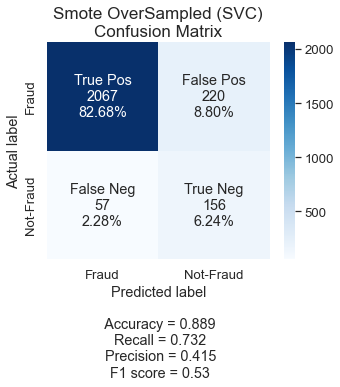

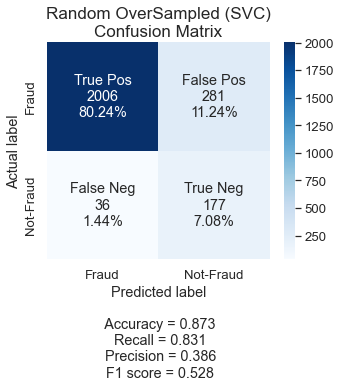

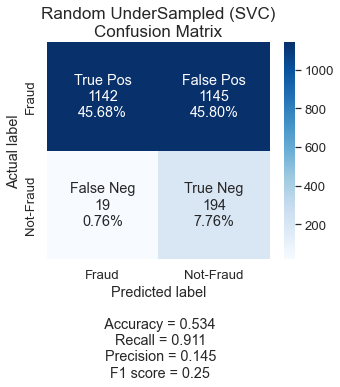

In [57]:
# List to store all of the different Accuracy produced by the different sampled data
SVC_MetricAcc_results_list = []

# Iterating over the y predict features from the different sampled data; and displaying metrics
for y_test_pred, title in zip(classifiers, titles):
    
    # Calling the Confusion matrix method to take in the y test and y test pred
    cfm = confusion_matrix(y_test, y_test_pred)
        
    # Displaying the "True Pos", "False Pos", "False Neg", and "True Neg" within the confusion matrix
    labels = ["True Pos", "False Pos", "False Neg", "True Neg"]
    counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
    
    # Displying the different labels within the Confusion Matrix
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,counts,percentages)]
    target_names = ["Fraud", "Not-Fraud"]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    sns.set(font_scale=1.2)

    # Getting the scores of different metrics
    accuracy  = metrics.accuracy_score(y_test, y_test_pred)
    recall    = metrics.recall_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    f1_score  = f"{2*(precision*recall) / (precision + recall) :.3}"

    # Converting metrics into 3 significant figures
    accuracy = ("%.3f" % accuracy)
    SVC_MetricAcc_results_list.append(accuracy)
    recall = ("%.3f" % recall)
    precision = ("%.3f" % precision)

    # Displaying the accuracy, precision and recall within the confusion matrix
    plt.title(title, fontsize = 17)
    plt.xlabel('Predicted label'+ "\n\n Accuracy = " + str(accuracy) + "\n Recall = " + str(recall)
              + "\n Precision = " + str(precision) + "\n F1 score = " + str(f1_score)) 
    plt.ylabel("Actual label") 
    plt.show()

# Recording the highest accuracy score produced by the different sampled data
SVC_MetricAcc_results = max(SVC_MetricAcc_results_list)

### AUC (SVC)

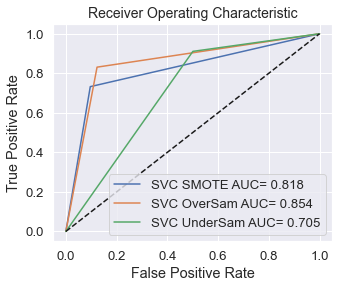

In [58]:
# Calculating and displaying the AUC curve of Somte OverSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_Sm_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="SVC SMOTE AUC= %0.3f" % auc)

# Calculating and displaying the AUC curve of Random OverSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_OverSam_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="SVC OverSam AUC= %0.3f" % auc)

# Calculating and displaying the AUC curve of Random UnderSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_UndSam_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="SVC UnderSam AUC= %0.3f" % auc)

# Ploting the random guess line of (50/50) True Positive and False Positive Rate
plt.rcParams["figure.figsize"] = (5,4)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Receiver Operating Characteristic", fontsize = 14)

# Labeling the X and Y axis of AUC chart
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Cross Validation (SVC)


In [59]:
# 10-Fold Cross validating on SVC model
scores = cross_val_score(SVCmodel,X,y,cv=5, scoring='accuracy')
print(scores)

[0.9135 0.9135 0.9135 0.9135 0.914 ]


In [60]:
# Calculating the mean Accuracy of 10-Fold Cross Validation on SVC model
avgSVC = scores.mean()
print("Average CV model accuracy:{:.3f}".format(avgSVC))

Average CV model accuracy:0.914


### Random Search (SVC)


In [61]:
# Specifying 2 different hyperparameters for Random Searh on SVC model; degrees and gamma
degree_list = list(range(1,5,2))
para_dict = dict(degree=(degree_list))
print(para_dict)


{'degree': [1, 3]}


In [62]:
# Conducting random search on different varitions of hyperparaters 
rand = RandomizedSearchCV(SVCmodel,para_dict,cv=5,scoring='accuracy',return_train_score=False,
                         n_iter=5)

# Fitting the random search technique to the X and Y train
rand.fit(Sm_Scaled_X_train,Sm_y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'degree': [1, 3]}, scoring='accuracy')

In [63]:
# Displaying the mean accuracy from 10-fold CV on different hyperparameters
pd.DataFrame(rand.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.966929,{'degree': 1}
1,0.966929,{'degree': 3}


In [64]:
# Recording the best Accuracy score from the random search
SVC_RandomS_results = float("%.3f" % rand.best_score_)

# Displaying the best Accuracy score and the hyperparameters used
print("The best model's accuracy: {:.3f}".format(rand.best_score_))
print("Used Parameters:", rand.best_params_)

The best model's accuracy: 0.967
Used Parameters: {'degree': 1}


### Decision Tree Classifier

In [65]:
# Calling the Decision Tree classifier
DecisionTree = DecisionTreeClassifier()

# Fitting the DT model to Smote OverSampled training set
DecisionTree.fit(PCA_Sm_X_train, Sm_y_train)
PCA_Sm_y_pred = DecisionTree.predict(PCA_Sm_X_test)
PCA_Sm_Acc = metrics.accuracy_score(y_test, PCA_Sm_y_pred)

# Fitting the DT model to Random OverSampled training set
DecisionTree.fit(PCA_ROS_X_train, ROS_y_train)
PCA_OverSam_y_pred = DecisionTree.predict(PCA_ROS_X_test)
PCA_OvrSam_Acc = metrics.accuracy_score(y_test, PCA_OverSam_y_pred)

# Fitting the DT model to Random UnderSampled training set
DecisionTree.fit(PCA_RUS_X_train, RUS_y_train)
PCA_UndSam_y_pred = DecisionTree.predict(PCA_RUS_X_test)
PCA_UndSam_Acc = metrics.accuracy_score(y_test, PCA_UndSam_y_pred)

### Confusion Matrix (DT)

In [66]:
# Specifying the different Titles for the DT confusion matrix
titles = ["Smote OverSampled (DT)\nConfusion Matrix", "Random OverSampled (DT)\nConfusion Matrix", "Random UnderSampled (DT)\nConfusion Matrix"]

# Specifying the y pred features from the different sampled data
classifiers = [PCA_Sm_y_pred, PCA_OverSam_y_pred, PCA_UndSam_y_pred]

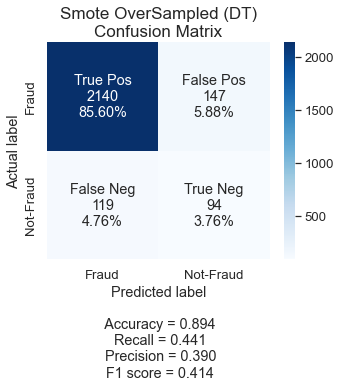

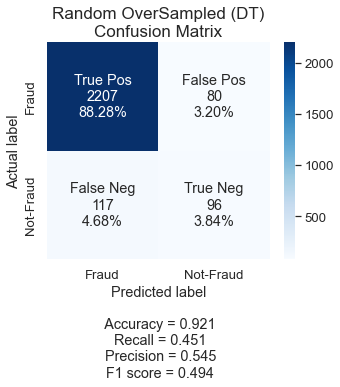

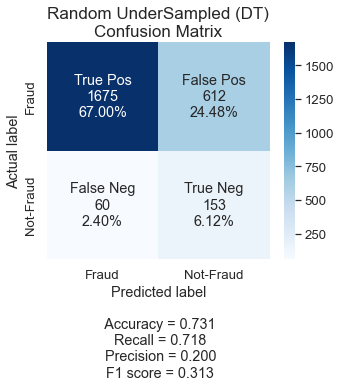

In [67]:
# List to store all of the different Accuracy produced by the different sampled data
DT_MetricAcc_results_list = []

# Iterating over the y predict features from the different sampled data; and displaying metrics
for y_test_pred, title in zip(classifiers, titles):
    
    # Calling the Confusion matrix method to take in the y test and y test pred
    cfm = confusion_matrix(y_test, y_test_pred)
        
    # Displaying the "True Pos", "False Pos", "False Neg", and "True Neg" within the confusion matrix
    labels = ["True Pos", "False Pos", "False Neg", "True Neg"]
    counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]

    # Displying the different labels within the Confusion Matrix
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels,counts,percentages)]
    target_names = ["Fraud", "Not-Fraud"]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    sns.set(font_scale=1.2)

    # Getting the scores of different metrics
    accuracy  = metrics.accuracy_score(y_test, y_test_pred)
    recall    = metrics.recall_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)

    f1_score  = f"{2*(precision*recall) / (precision + recall) :.3}"

    # Converting metrics into 3 significant figures
    accuracy = ("%.3f" % accuracy)
    DT_MetricAcc_results_list.append(accuracy)
    recall = ("%.3f" % recall)
    precision = ("%.3f" % precision)
    
    # Displaying the accuracy, precision and recall within the confusion matrix
    plt.title(title, fontsize = 17)
    plt.xlabel('Predicted label'+ "\n\n Accuracy = " + str(accuracy) + "\n Recall = " + str(recall)
              + "\n Precision = " + str(precision) + "\n F1 score = " + str(f1_score)) 
    plt.ylabel("Actual label") 
    plt.show()

# Recording the highest accuracy score produced by the different sampled data
DT_MetricAcc_results = max(DT_MetricAcc_results_list)

### AUC (Decision Tree)

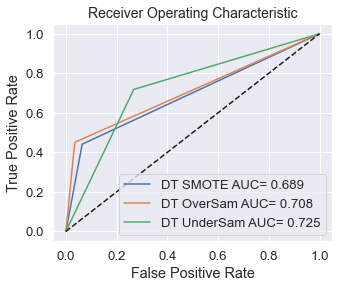

In [68]:
# Calculating and displaying the AUC curve of Somte OverSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_Sm_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="DT SMOTE AUC= %0.3f" % auc)

# Calculating and displaying the AUC curve of Random OverSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_OverSam_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="DT OverSam AUC= %0.3f" % auc)

# Calculating and displaying the AUC curve of Random UnderSampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  PCA_UndSam_y_pred)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="DT UnderSam AUC= %0.3f" % auc)

# Ploting the random guess line of (50/50) True Positive and False Positive Rate
plt.rcParams["figure.figsize"] = (5,4)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Receiver Operating Characteristic", fontsize = 14)

# Labeling the X and Y axis of AUC chart
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Cross Validation (DT)


In [69]:
# 10-Fold Cross validating on DT model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree,X,y,cv=5, scoring='accuracy')
print(scores)

[0.911  0.9675 0.97   0.97   0.6485]


In [70]:
# Calculating the mean Accuracy of 10-Fold Cross Validation on KNN model
avgDecisionTree = scores.mean()
print("Average CV model accuracy:{:.3f}".format(avgSVC))

Average CV model accuracy:0.914


### Random Search (DT)

In [71]:
# Specifying 2 different hyperparameters for Random Searh on KNN model; max_depth and criterion
max_depth_list = list(range(0,10))
criterion_list = ['gini', 'entropy']
para_dict = dict(max_depth=(max_depth_list), criterion = criterion_list)
print(para_dict)

{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'criterion': ['gini', 'entropy']}


In [72]:
# Conducting random search on different varitions of hyperparaters 
rand = RandomizedSearchCV(DecisionTree,para_dict,cv=5,scoring='accuracy',return_train_score=False,
                         n_iter=5, random_state=5)

# Fitting the random search technique to the X and Y train
rand.fit(ROS_Scaled_X_train,ROS_y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9]},
                   random_state=5, scoring='accuracy')

In [73]:
# Displaying the mean accuracy from 10-fold CV on different hyperparameters
pd.DataFrame(rand.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.862535,"{'max_depth': 2, 'criterion': 'gini'}"
1,0.941671,"{'max_depth': 5, 'criterion': 'gini'}"
2,0.962038,"{'max_depth': 7, 'criterion': 'entropy'}"
3,0.975982,"{'max_depth': 9, 'criterion': 'entropy'}"
4,0.860929,"{'max_depth': 2, 'criterion': 'entropy'}"


In [74]:
# Recording the best Accuracy score from the random search
DT_RandomS_results = float("%.3f" % rand.best_score_)

# Displaying the best Accuracy score and the hyperparameters used
print("The best model's accuracy: {:.3f}".format(rand.best_score_))
print("Used values:", rand.best_params_)

The best model's accuracy: 0.976
Used values: {'max_depth': 9, 'criterion': 'entropy'}


## Evaluation

### Avg CV model

In [75]:
# Evaluating 10-fold CV mean score of different Machine Learning Algorithms
Technique = ["KNeighborsClassifier", "Support Vector Classifier", "Decision Tree"]
Mean_CV_Scores = [avgKNN, avgSVC, avgDecisionTree]
results=pd.DataFrame({'Model': Technique,'10-Fold CV score mean (Train)': Mean_CV_Scores})
display(results)

,Model,10-Fold CV score mean (Train)
0,KNeighborsClassifier,0.8903
1,Support Vector Classifier,0.9136
2,Decision Tree,0.8934


(0.0, 1.1)

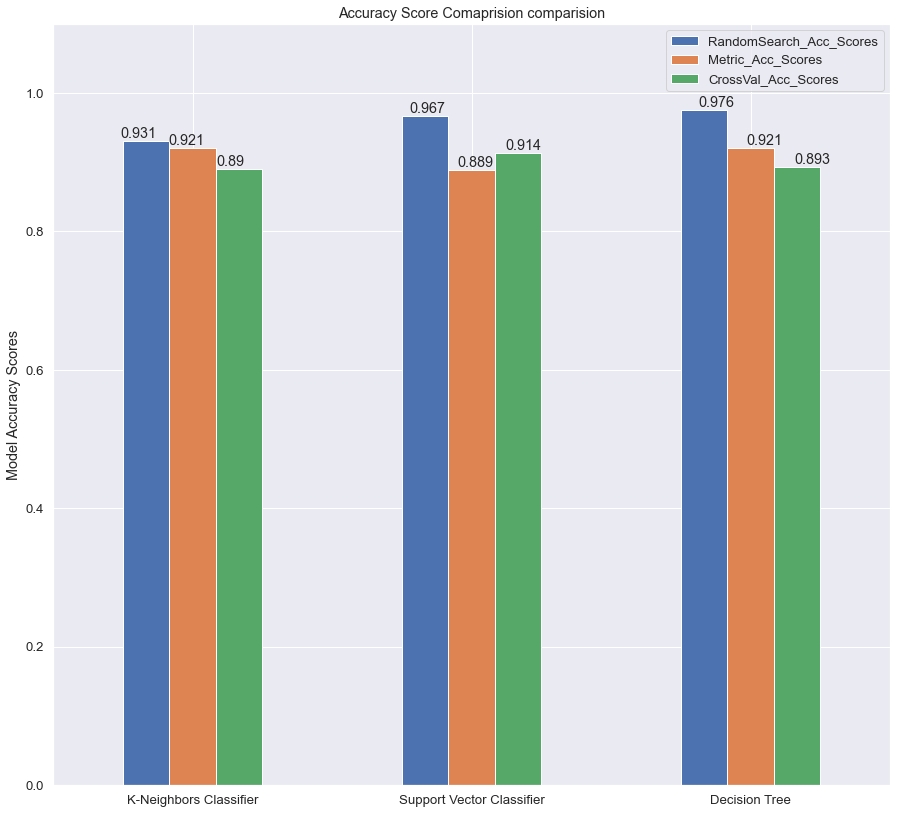

In [84]:
# Getting the Highest Accuracy Scores of Random Search, Metrics, and Cross Validation on different models
RandomSearch_Acc_Scores = [KNN_RandomS_results, SVC_RandomS_results, DT_RandomS_results]
Metric_Acc_Scores =  [KNN_MetricAcc_results, SVC_MetricAcc_results, DT_MetricAcc_results]
CrossVal_Acc_Scores =  [round(avgKNN,3), round(avgSVC,3), round(avgDecisionTree,3)]

# Specifying different machine learning model labels
index = ["K-Neighbors Classifier", "Support Vector Classifier", "Decision Tree"]

# Recording the different Accuracy scores into a data frame
df = pd.DataFrame({'RandomSearch_Acc_Scores': RandomSearch_Acc_Scores,
                   'Metric_Acc_Scores': Metric_Acc_Scores,
                   'CrossVal_Acc_Scores': CrossVal_Acc_Scores}, index=index)

# Converting the data frame into a float and displaying the bar chart
df = df.astype(float)
ax = df.plot(kind='bar', rot=0, title="Accuracy Score Comaprision comparision", figsize=(15,14))
ax.set_ylabel("Model Accuracy Scores")

# Displaying the number of records on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.035, p.get_height() * 1.005))
plt.ylim(0, 1.1)

## Intresting Findings

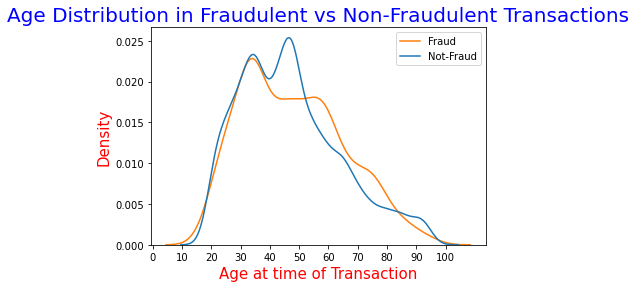

In [42]:
# Plotting a line chart of Age Distribution in Fraudulent vs Non-Fraudulent Transactions
sns.kdeplot(x='Age_Time_of_Transaction',data=data, hue='is_fraud', common_norm=False)

# Specifying the X axis, Y axis and title of the chart
plt.xlabel("Age at time of Transaction", color='r', fontsize='15')
plt.ylabel("Density", color='r', fontsize='15')
plt.title("Age Distribution in Fraudulent vs Non-Fraudulent Transactions", color='b', fontsize='20')

# Specifying the bin size of different age group to display in the chart
plt.xticks(np.arange(0,110,10))

# Specifying the Fraud and Not-Fraud labels
plt.legend(labels=['Fraud', 'Not-Fraud'])

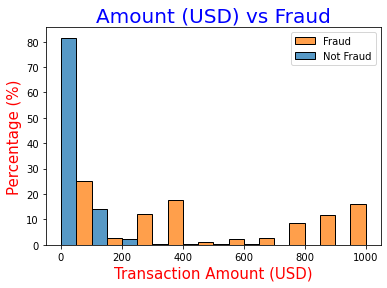

In [73]:
# Displaying a histogram of different amounts in USD of Fraud and Not Fraud Transactions
sns.histplot(x='amt',data=data[data.amt<=1000], hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=10)

# Specifying the X axis, Y axis and title of the chart
plt.xlabel("Transaction Amount (USD)", color='r', fontsize='15')
plt.ylabel("Percentage (%)", color='r', fontsize='15')
plt.title("Amount (USD) vs Fraud", color='b', fontsize='20')

# Specifying the Fraud and Not-Fraud labels
plt.legend(labels=['Fraud', 'Not Fraud'])

is_fraud
Fraud        AxesSubplot(0.125,0.125;0.775x0.755)
Not Fraud    AxesSubplot(0.125,0.125;0.775x0.755)
Name: count, dtype: object

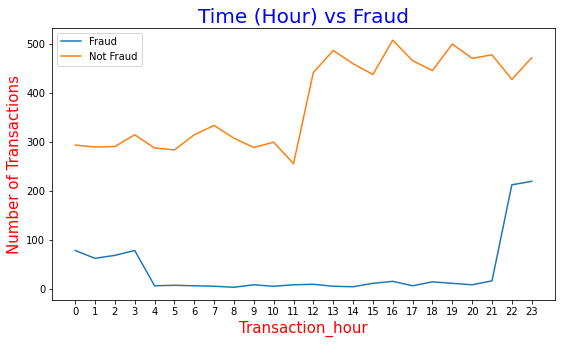

In [44]:
# Chaning the 0 and 1 value in is_fraud attribute to Fraud and Not Fraud for visualisaion purposes
EDA_Data.loc[EDA_Data["is_fraud"] == 1, "is_fraud"] = "Fraud"
EDA_Data.loc[EDA_Data["is_fraud"] == 0, "is_fraud"] = "Not Fraud"

# Grouping the is_fraud and transaction_hour attribute to see time series data of when most of the trasactions happen
HourVFraud = EDA_Data.groupby(['is_fraud','Transaction_hour'])["is_fraud"].count().reset_index(name="count")

# Defining the index column
HourVFraud.set_index('Transaction_hour', inplace=True)

# Specifying the X axis, Y axis and title of the chart
plt.xticks(np.arange(0,24,1))
plt.xlabel("Time (Hour)", color='r', fontsize='15')
plt.ylabel("Number of Transactions", color='r', fontsize='15')
plt.title("Time (Hour) vs Fraud", color='b', fontsize='20')

# Plotting the grouped chart
HourVFraud.groupby('is_fraud')['count'].plot(legend = True, figsize=(9,5))

In [45]:
EDA_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Transaction_month        10000 non-null  int64         
 1   Transaction_week         10000 non-null  int64         
 2   Transaction_day          10000 non-null  int64         
 3   Transaction_hour         10000 non-null  int64         
 4   Weekend_Transaction      10000 non-null  bool          
 5   Age_Time_of_Transaction  10000 non-null  int64         
 6   Issuing_Network          10000 non-null  object        
 7   cc_num                   10000 non-null  string        
 8   Transaction_mnth_sin     10000 non-null  float64       
 9   Transaction_mnth_cos     10000 non-null  float64       
 10  Transaction_week_sin     10000 non-null  float64       
 11  Transaction_week_cos     10000 non-null  float64       
 12  Transaction_day_sin      10000 no

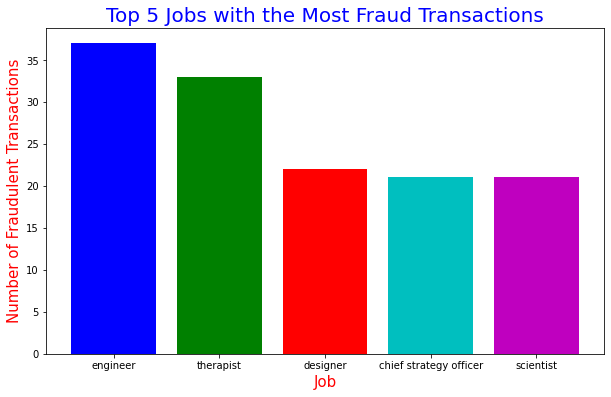

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to include only fraudulent transactions
fraud_data = EDA_Data[EDA_Data['is_fraud'] == "Fraud"]

# Assuming the correct column name for the city is 'state' (replace with the actual column name)
top_cities = fraud_data['job'].value_counts().head(5)

# Define different colors for the bars
colors = ['b', 'g', 'r', 'c', 'm']

# Creating a bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values, color=colors)

# Specifying the X axis, Y axis, and title of the chart
plt.xlabel("Job", color='r', fontsize='15')
plt.ylabel("Number of Fraudulent Transactions", color='r', fontsize='15')
plt.title("Top 5 Jobs with the Most Fraud Transactions", color='b', fontsize='20')

# Renaming the x-axis labels
plt.xticks(top_cities.index)

# Displaying the chart
plt.show()


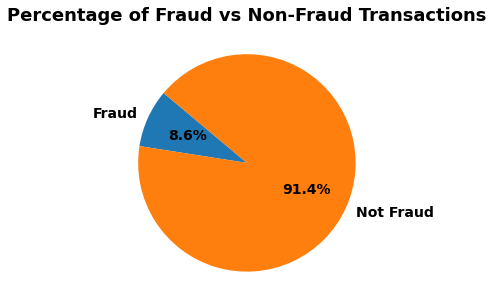

In [79]:
import matplotlib.pyplot as plt

# Assuming 'is_fraud' is the correct column name for fraud transactions in your DataFrame
fraud_count = EDA_Data[EDA_Data['is_fraud'] == "Fraud"].shape[0]
not_fraud_count = EDA_Data[EDA_Data['is_fraud'] == "Not Fraud"].shape[0]

# Calculate percentages
total_transactions = fraud_count + not_fraud_count
fraud_percentage = (fraud_count / total_transactions) * 100
not_fraud_percentage = (not_fraud_count / total_transactions) * 100

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie([fraud_percentage, not_fraud_percentage], labels=['Fraud', 'Not Fraud'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold'})

# Add a title
plt.title("Percentage of Fraud vs Non-Fraud Transactions", fontsize=18, fontweight='bold')

# Display the chart
plt.show()
